https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from collections import Counter
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv(r'data/train.csv')

In [3]:
df.shape

(1804874, 45)

In [4]:
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

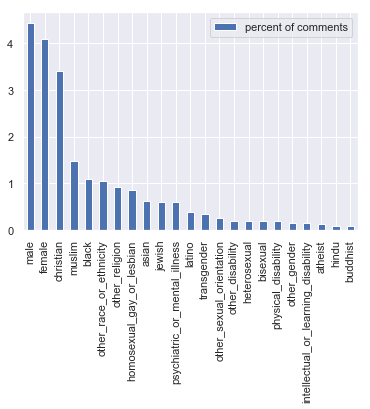

In [5]:
column_counts = {}
for col in df.columns[8:-14]:
    column_counts[col] = 100* df[df[col]>0].shape[0] / df.shape[0]
    
pd.DataFrame(column_counts, index=['percent of comments']).T \
    .sort_values(by='percent of comments', ascending=False) \
    .plot(kind='bar');

In [6]:
most_toxic = df['target'].max()
most_toxic_comments = df[df['target'] == most_toxic]['comment_text']
for _ in range(5):
    print(most_toxic_comments.iloc[random.randint(0, most_toxic_comments.shape[0])], '\n')

Goldwater lost by a landslide and it wasn't because of Vietnam. Vietnam became LBJ's war, and the huge protests drove him from seeking reelection. Nixon won with dirty tricks and was tossed out on his ear. Nixon prolonged the war by stalling the peace talks, and thousands of additional US military died. But I see your point, Trump said he would get the US out of Afghanistan because he thought that would get him votes. So now, another campaign promise tossed into the circular file. No matter, his base will still love him. In the meantime the US will still be fighting a war of attrition against people who have a lifetime stake in their country. Pretty stupid. 

Read there are two pakalolo bills in the leg.  They might get to checkout before medical marijuana's  in the state pharmacy.  No fed taxes!  Dumb tourists spending money foolishly on all sorts of overpriced trash. It'll be good for business. (Heehee.). 

Per your US comments:

Joshua has a deep seeded hatred of the Americans due t

In [7]:
all_comments = []
for comment in most_toxic_comments:
    for word in comment.replace('\n',' ').replace('.',' ').lower().split(' '):
        all_comments.append(word)

In [8]:
c = Counter(all_comments)

In [9]:
c.most_common(30)

[('', 22268),
 ('the', 9859),
 ('to', 5794),
 ('and', 5528),
 ('a', 4819),
 ('of', 4320),
 ('is', 3760),
 ('that', 2733),
 ('in', 2675),
 ('you', 2622),
 ('for', 2055),
 ('are', 1855),
 ('i', 1783),
 ('it', 1683),
 ('not', 1502),
 ('this', 1447),
 ('be', 1396),
 ('have', 1354),
 ('they', 1353),
 ('he', 1333),
 ('with', 1321),
 ('on', 1293),
 ('as', 1154),
 ('his', 970),
 ('all', 933),
 ('but', 928),
 ('trump', 926),
 ('was', 904),
 ('your', 894),
 ('what', 892)]

In [10]:
def trump_finder(comment):
    if 'trump' in comment.lower():
        return True
    else:
        return False

df['trump_mentioned'] = df['comment_text'].apply(trump_finder)
trump_mentioned_toxicity = df[df['trump_mentioned']]['target'].mean()
trump_not_mentioned_toxicity = df[df['trump_mentioned']==False]['target'].mean()
print(trump_mentioned_toxicity)
print(trump_not_mentioned_toxicity)

0.1644325432511276
0.09637928011859212


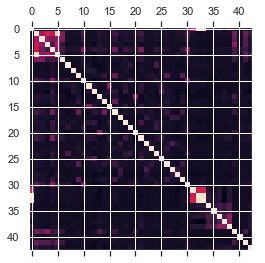

In [11]:
corr = df.corr()
plt.matshow(corr);

In [12]:
corr['target'].sort_values(ascending=False)

target                                 1.000000
insult                                 0.928207
obscene                                0.493058
identity_attack                        0.450017
severe_toxicity                        0.393425
threat                                 0.287761
sexual_explicit                        0.252507
toxicity_annotator_count               0.236597
white                                  0.194012
black                                  0.167224
muslim                                 0.134491
homosexual_gay_or_lesbian              0.131110
trump_mentioned                        0.102453
male                                   0.073822
female                                 0.062904
psychiatric_or_mental_illness          0.055470
jewish                                 0.047042
transgender                            0.042517
heterosexual                           0.038193
other_race_or_ethnicity                0.035916
intellectual_or_learning_disability    0

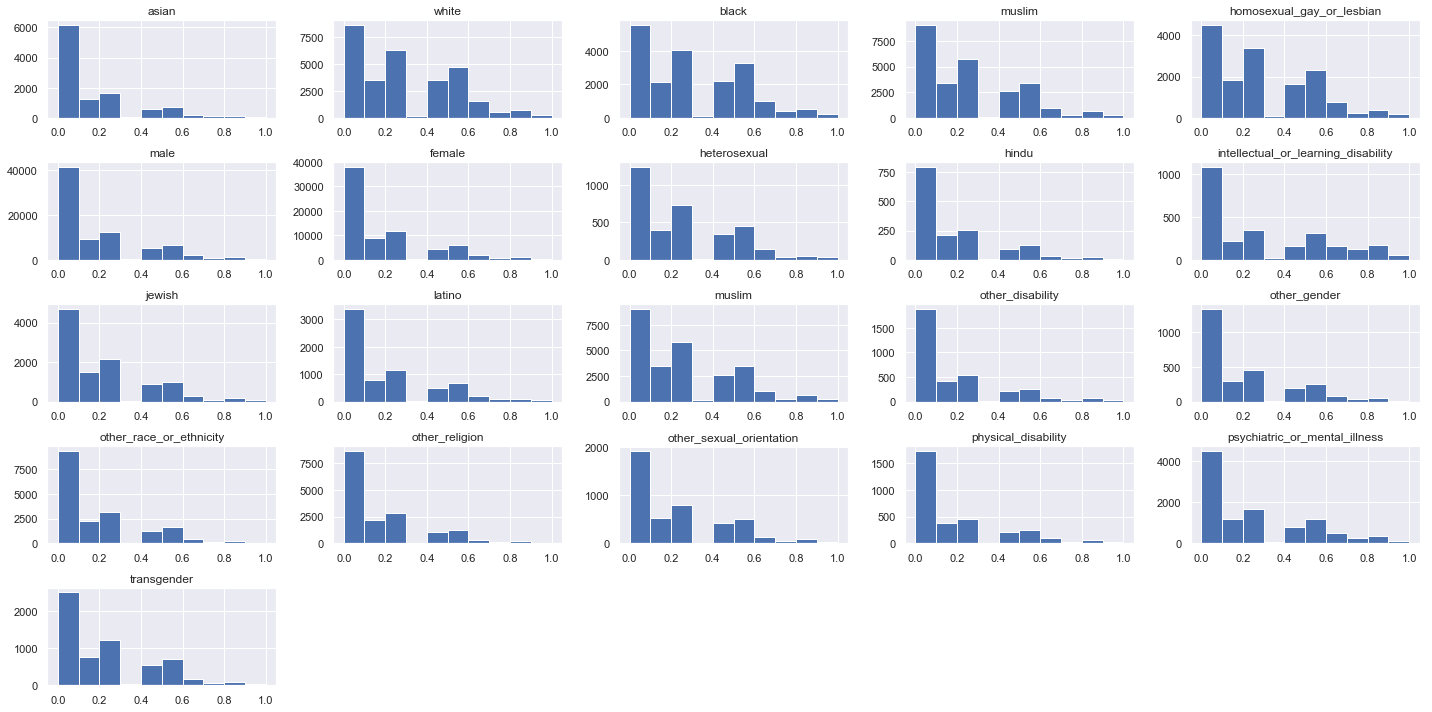

In [13]:
fig = plt.figure(figsize=(20,10))
for i, category in enumerate(['asian', 'white', 'black',
                    'muslim', 'homosexual_gay_or_lesbian', 'male', 'female', 
       'heterosexual', 'hindu', 'intellectual_or_learning_disability', 'jewish', 'latino', 
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender']):
    ax = fig.add_subplot(5, 5, i+1)
    df[df[category] > 0]['target'].hist(ax=ax)
    ax.set_title(category)
    fig.tight_layout()